<a href="https://colab.research.google.com/github/ClaudioCaniullan/Machine-Learning-Naive-Bayes-Aplicaciones/blob/main/Naive_Bayes_Breast_Cancer_Ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTITUTO DATA SCIENCE ARGENTINA S.A**
** Diplomatura en Ciencia de Datos con R y Python**

**Ejercicio en Clases**

**OBJETIVO**: Realizar una predicción con el set de datos de Breast Cancer usando el algoritmo Naive Bayes.

**Estructura del programa**

- Importar librerías
- Seleccionar el dataset
- Explorar los Datos
- Dividir los datos para training y test (70%/30% o 80%/20%)
- Predecir con el clasificador seleccionado

**Herramientas**  

- DataSets: Breast Cancer
- Algoritmo: Naive Bayes 
    - sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
- Medidor del Clasificador: Matriz de Confusión 
- Función Split para dividir la data en set de Training y Test




**ALGORITMO NAIVE BAYES Y SUS PARÁMETROS**

**sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)**

- priors: array-like of shape (n_classes,)
Probabilidades previas de las clases. Si se especifica, los antecedentes no se ajustan de acuerdo con los datos.

- var_smoothing: float, predeterminado = 1e-9
Porción de la variación más grande de todas las características que se agrega a las variaciones para la estabilidad del cálculo.


In [27]:
# Importar librerías y métodos
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [28]:
# Guardar Breast Cancer en dataset
dataset = datasets.load_breast_cancer()

In [29]:
# Verificar las dimensiones contenidas en el dataset
print('Información en el dataset:')
print(dataset.keys())

Información en el dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [30]:
# Verificar las características del dataset
print('Características del dataset:')
print(dataset.DESCR)

Características del dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instan

**Seleccionamos todas las columnas**
    
    X = dataset.data

**Defino los datos correspondientes a las etiquetas**

    y = dataset.target
    


In [31]:
# Seleccionar todas las columnas
X = dataset.data

# Definir los datos correspondientes a las etiquetas
y = dataset.target

In [32]:
# Verificar las características del dataset X
print(dataset.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [33]:
# Verificar el target y 
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [34]:
# Separar los datos en "train" y "test" para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir Naive Bayes como "algoritmo"
algoritmo = GaussianNB()

# Entrenar el modelo (Fit)
algoritmo.fit(X_train, y_train)

# Realizar la predicción
y_pred = algoritmo.predict(X_test)

print('Dado el conjunto de prueba X_test')
print(X_test)
print('Tenemos que 0:tiene cáncer, 1:no tiene cáncer')
print(y_pred)


Dado el conjunto de prueba X_test
[[1.316e+01 2.054e+01 8.406e+01 ... 4.195e-02 2.687e-01 7.429e-02]
 [1.561e+01 1.938e+01 1.000e+02 ... 8.568e-02 2.683e-01 6.829e-02]
 [2.009e+01 2.386e+01 1.347e+02 ... 1.923e-01 3.294e-01 9.469e-02]
 ...
 [1.247e+01 1.860e+01 8.109e+01 ... 1.015e-01 3.014e-01 8.750e-02]
 [1.365e+01 1.316e+01 8.788e+01 ... 8.056e-02 2.380e-01 8.718e-02]
 [1.411e+01 1.288e+01 9.003e+01 ... 5.890e-02 2.100e-01 7.083e-02]]
Tenemos que 0:tiene cáncer, 1:no tiene cáncer
[1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1]


![image.png](attachment:image.png)

![image.png](attachment:image.png)

Matriz de Confusión:
[[38  4]
 [ 6 66]]


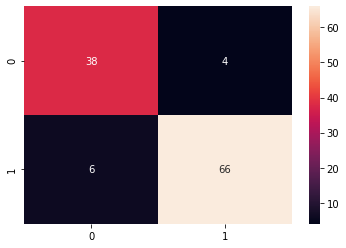

In [42]:
# Generar y analizar la matriz de Confusión
import seaborn as sn
import matplotlib.pyplot as plt

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

sn.heatmap(matriz, annot=True)
plt.show()


**Reporte de métricas**

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=None))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



**Conclusiones**

1.ACCURACY ¿Qué porcentaje de predicciones el modelo clasifico correctamente? la proporción o porcentaje obtenido por el modelo para tareas de clasificación viene dado por un 91% de aciertos.

2.PRECISIÓN ¿Qué porcentaje de predicciones positivas el modelo clasifico correctamente? 86%

3.SENSIBILIDAD ¿Qué porcentaje de predicciones positivas reales el modelo clasifico correctamente?90%

4.ESPECIFICIDAD ¿Qué porcentaje de predicciones negativas reales el modelo clasifico correctamente? TN/TN+FP

5.PUNTUACIÓN F1 ¿Cuánto es la robustez del modelo? 88%

In [43]:
# Accuracy(escactitud): mide el porcentaje de casos que el modelo ha acertado (TP+TN/TP+TN+FP+FN)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9122807017543859

In [37]:
# Precision: mide la calidad del modelo de machine learning en tareas de clasificación (TP/TP+FP)
# ¿Qué porcentaje de lo identificado como positivo es realmente correcto?
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.9122807017543859

In [38]:
# Recall(sensibilidad) - ¿Qué porcentaje de los valores positivos reales fueron bien identificados?
# (Tasa positiva real= TP/TP+FP)
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

0.9122807017543859

In [39]:
# Puntuación F1: Rendimiento combinado de la precisión y la sensibilidad
# (2TP/2TP+FP+FN)  
from sklearn.metrics import f1_score 
f1_score(y_test, y_pred, average='micro')

0.9122807017543859